s.kaviya , 24BAD059
MSE : 0.9506124852639466
RMSE: 0.9749935821655169
R² Score: 0.9538050576229


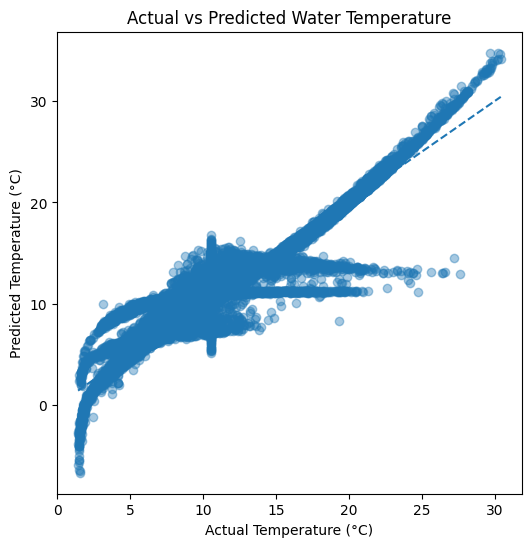

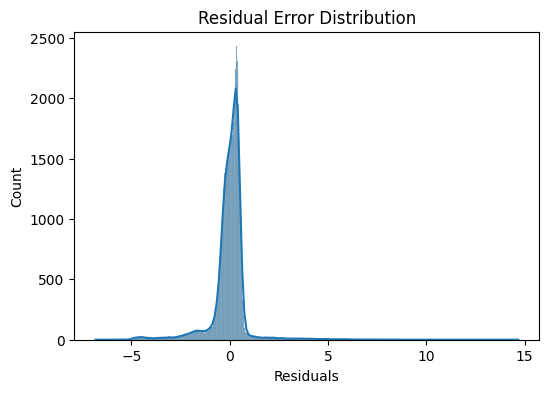

Ridge R² Score: 0.9538050433381767
Lasso R² Score: 0.9534729109656109


In [2]:
print("s.kaviya , 24BAD059")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv(
    r"bottle.csv",
    low_memory=False
)

df.head()
features = ['Depthm', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat']
target = 'T_degC'
X = df[features]
y = df[target]
X = X.fillna(X.mean())
y = y.fillna(y.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE :", mse)
print("RMSE:", rmse)
print("R² Score:", r2)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Water Temperature")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.show()
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual Error Distribution")
plt.xlabel("Residuals")
plt.show()
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge R² Score:", r2_score(y_test, ridge_pred))
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso R² Score:", r2_score(y_test, lasso_pred))